In [1]:
#http://tomslee.net/airbnb-data-collection-get-the-data
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import os

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from random import randint
import sklearn
print (sklearn.__version__) #0.19.1
os.getcwd()
os.chdir('/Users/niloofarzarifi/Desktop/Udacity/khaneh/airbnb-Toronto/')

df1 = pd.read_csv('./2017/tomslee_airbnb_toronto_0778_2017-01-14.csv')
df2 = pd.read_csv('./2017/tomslee_airbnb_toronto_0857_2017-02-16.csv')
df3 = pd.read_csv('./2017/tomslee_airbnb_toronto_0930_2017-03-12.csv')
df4 = pd.read_csv('./2017/tomslee_airbnb_toronto_1042_2017-04-08.csv')

0.19.1


In [2]:
frames = [df1, df2,df3,df4]
result=pd.concat(frames)
result.shape

result=result.drop(['borough','minstay','room_id','host_id','latitude','longitude','last_modified'],axis=1)

result.columns.tolist()

['room_type',
 'neighborhood',
 'reviews',
 'overall_satisfaction',
 'accommodates',
 'bedrooms',
 'price']

In [19]:
data=pd.read_csv('./cleaned-airbnb.csv')
y=data['overall_satisfaction']*2  
#int format converts 4.5, 3.5 that's why I changed it to 2,3,4,...10 
y=y.astype(int) 

X=data.drop(['overall_satisfaction'],axis=1)
#only interested to use z-score for price col, 
#StandardScaler will change all dummies to continus number which decreases the accuracy score by 3%
X['price']= (data['price'] - data['price'].mean())/data['price'].std(ddof=0)


In [20]:
#let's ignore neighborhood
XX=X[['reviews','accommodates','bedrooms','price','room_type_Private room','room_type_Shared room']]
XX.head()
XX_train, XX_test, y_train, y_test = train_test_split(XX, y, test_size=0.3, stratify=y ,random_state=0)
#
#

/Users/niloofarzarifi/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/niloofarzarifi/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/niloofarzarifi/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


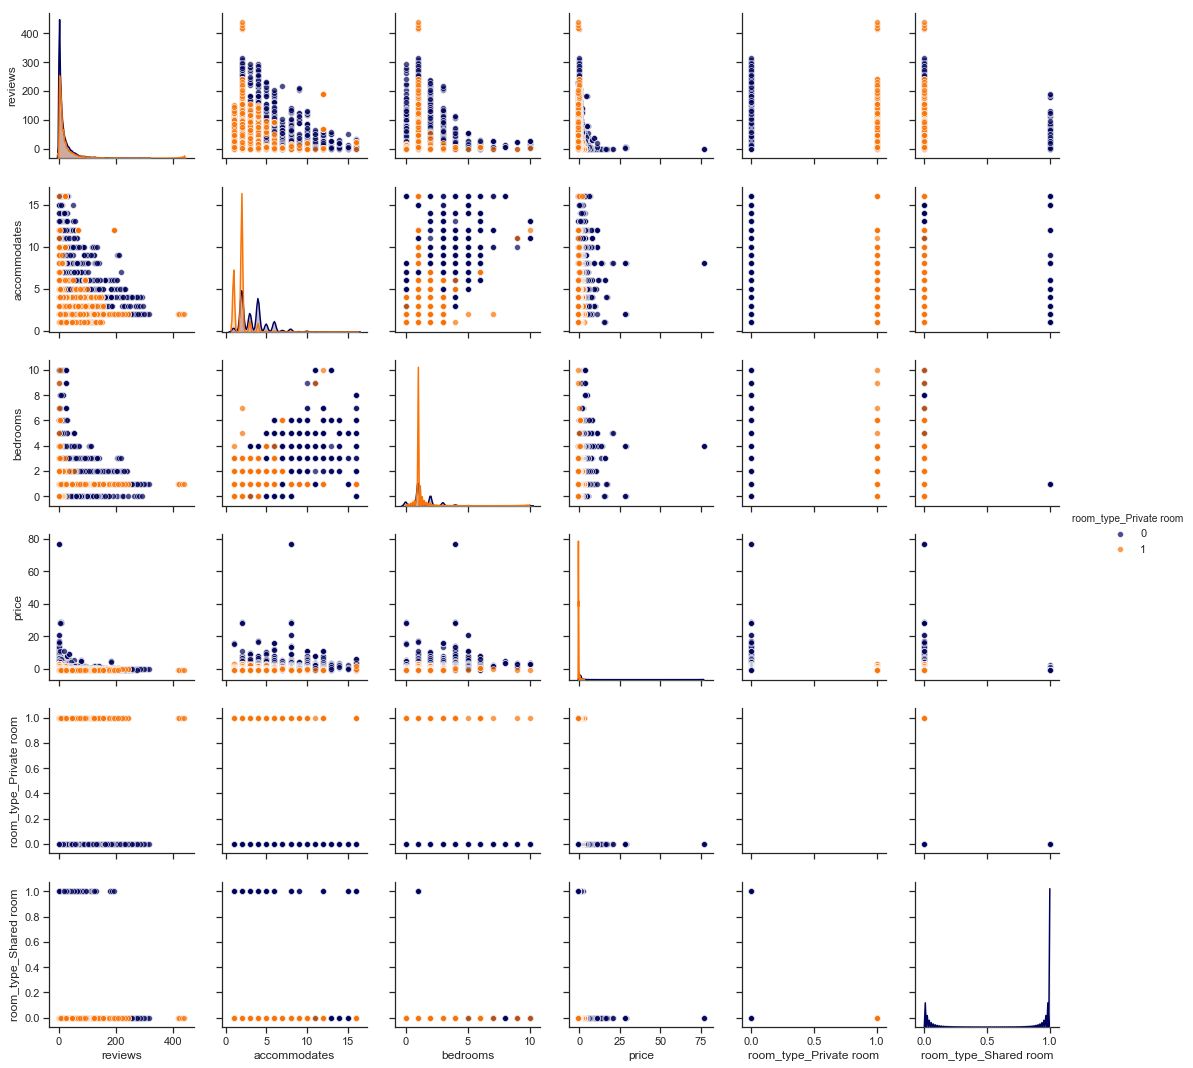

In [21]:
#This plot is not helpful since accommodates and bedrooms have over 10 unique values it is hard to visualize here
# Use seaborn for pair plots
import seaborn as sns
sns.set(style="ticks", color_codes=True);

# Create a custom color palete
palette = sns.xkcd_palette(['dark blue', 'orange'])

# Make the pair plot with a some aesthetic changes
sns.pairplot(XX, hue = 'room_type_Private room', diag_kind = 'kde', palette= palette, plot_kws=dict(alpha = 0.7),
                   diag_kws=dict(shade=True));

In [22]:
#choose features RFE
#RFE
#tolerance of 0.001
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
model= LogisticRegression(multi_class='multinomial',random_state=0,penalty='l2',tol=0.0001,solver='lbfgs')

Listfeatures=XX.columns.tolist()

all_accuracy = []
feature_set = []
best_accuracy = 0

k = 6 #number of features
for i in range(1,k+1):
    selector = RFE(model, i,verbose=0)
    selector = selector.fit(XX, y)
    current_accuracy = selector.score(XX,y)

    all_accuracy.append(current_accuracy)
    feature_set.append(selector.support_)
    if current_accuracy- best_accuracy > 0.001:
        best_accuracy = current_accuracy
        selected_features=selector.support_
        final_ranking=list(selector.ranking_)
print ('selected_features: ', selected_features)    
print ('final_ranking: ',final_ranking )
for i in range(0,len(Listfeatures)):
    case={final_ranking[i]:Listfeatures[i]}
    print case
   

('selected_features: ', array([ True,  True,  True,  True,  True,  True], dtype=bool))
('final_ranking: ', [1, 1, 1, 1, 1, 1])
{1: 'reviews'}
{1: 'accommodates'}
{1: 'bedrooms'}
{1: 'price'}
{1: 'room_type_Private room'}
{1: 'room_type_Shared room'}


In [23]:
print XX.columns.tolist()

['reviews', 'accommodates', 'bedrooms', 'price', 'room_type_Private room', 'room_type_Shared room']


In [24]:
"""
In the multiclass case, 
1.the training algorithm uses the one-vs-rest (OvR) scheme if the ‘multi_class’ option is set to‘ovr’, 
2.uses the cross-entropy loss if the ‘multi_class’ option is set to ‘multinomial’. 

Note that regularization is applied by default.
"""
from sklearn.linear_model import LogisticRegression

model= LogisticRegression(multi_class='multinomial',random_state=0,penalty='l2',tol=0.0001)
model.get_params()
#now we know parameters

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'multinomial',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [25]:
#For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; 
#‘liblinear’ is limited to one-versus-rest schemes.
model= LogisticRegression(multi_class='multinomial',random_state=0,penalty='l2',tol=0.0001,solver='lbfgs')
model.fit(XX_train, y_train)  #fit the model
y_pred=model.predict(XX_train) #make prediction on test set
accuracy_score(y_train,y_pred)
#multi_class='multinomial' and 'ovr' both reached 0.75 score

0.75188607273035513

In [26]:
from sklearn.linear_model import LogisticRegressionCV
model = LogisticRegressionCV(cv=5, random_state=0, multi_class='ovr').fit(XX_train, y_train)
y_pred=model.predict(XX_train) 
accuracy_score(y_train,y_pred)

/Users/niloofarzarifi/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


0.72741657483541011

In [27]:
"""
This estimator implements regularized linear models with stochastic gradient descent (SGD) learning:
the gradient of the loss is estimated each sample at a time and the model is updated along the way with 
a decreasing strength schedule (aka learning rate)
The model it fits can be controlled with the loss parameter; by default, it fits a linear support vector machine (SVM)
The regularizer is a penalty added to the loss function that shrinks model parameters towards the zero vector using 
either the squared euclidean norm L2 or the absolute norm L1 or a combination of both 
"""

'\nThis estimator implements regularized linear models with stochastic gradient descent (SGD) learning:\nthe gradient of the loss is estimated each sample at a time and the model is updated along the way with \na decreasing strength schedule (aka learning rate)\nThe model it fits can be controlled with the loss parameter; by default, it fits a linear support vector machine (SVM)\nThe regularizer is a penalty added to the loss function that shrinks model parameters towards the zero vector using \neither the squared euclidean norm L2 or the absolute norm L1 or a combination of both \n'

In [28]:
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
#loss:Defaults to ‘hinge’, which gives a linear SVM.‘log’ loss gives logistic regression
model = linear_model.SGDClassifier(loss='log', learning_rate='constant', eta0=0.01, penalty='l2',
                                   alpha=1,max_iter=1000, tol=1e-3)

In [29]:
model.fit(XX_train, y_train)  
y_pred=model.predict(XX_train) 
accuracy_score(y_train,y_pred) #hinge is 0.72 and log is 0.68

0.69820010737193072

In [30]:
#import parfit.parfit as pf
#https://towardsdatascience.com/how-to-make-sgd-classifier-perform-as-well-as-logistic-regression-using-parfit-cc10bca2d3c4
    
    

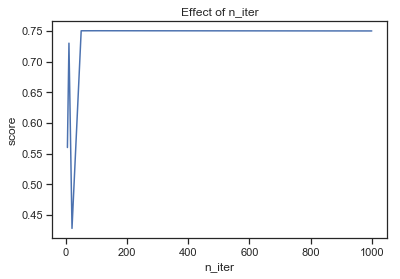

In [31]:
#performance of iteration
#why I need random_state?
#we call SGD few times, although XX_train are fixed dataset everytime SDG starts with different dataponit to do
#gradient descent which results in variation in the plot
n_iters = [5, 10, 20, 50, 100, 1000]
scores = []
for n_iter in n_iters:
    model = SGDClassifier(loss="hinge", penalty="l2", max_iter=n_iter,random_state=20)
    model.fit(XX_train, y_train)
    scores.append(model.score(XX_test, y_test))
  
plt.title("Effect of n_iter")
plt.xlabel("n_iter")
plt.ylabel("score")
plt.plot(n_iters, scores) 

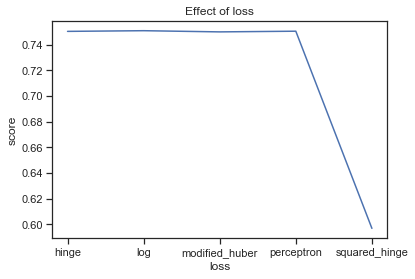

In [32]:
# performance of losses
#why I need random_state? if I dont fix random_state each time loss function starts with different data point 
#which ends up to inconsistent plot
losses = ["hinge", "log", "modified_huber", "perceptron", "squared_hinge"]
scores = []
for loss in losses:
    model = SGDClassifier(loss=loss, penalty="l2", max_iter=1000,random_state=20)
    model.fit(XX_train, y_train)
    scores.append(model.score(XX_test, y_test))
  
plt.title("Effect of loss")
plt.xlabel("loss")
plt.ylabel("score")
x = np.arange(len(losses))
plt.xticks(x, losses)
plt.plot(x, scores) 

In [ ]:
"""
we also could use GridSearchCV with param_graid and model.best_estimator_ to optimize models
"""

In [33]:
#let's check default
from sklearn import svm
model= svm.SVC()
model.get_params()
#same as previous models we could gridsearch all these parameters

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [34]:
model.fit(XX_train, y_train)  
y_pred=model.predict(XX_train) 
accuracy_score(y_train,y_pred)

0.76807662965160639

In [ ]:
"""
example of visualization x1 and x2
w = clf.coef_[0]
print(w)
a = -w[0] / w[1]
xx = np.linspace(0,12)
yy = a * xx - clf.intercept_[0] / w[1]
h0 = plt.plot(xx, yy, 'k-', label="non weighted div")
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.legend()
"""

In [35]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(n_estimators=15)


model.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 15,
 'random_state': None}

In [36]:
model.fit(XX_train, y_train)  
y_pred=model.predict(XX_train) 
accuracy_score(y_train,y_pred)

0.75095363227939305

In [ ]:
#Handling Character Data for Machine Learning (encoding)
#https://dzone.com/articles/handling-character-data-for-machine-learning

In [3]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import label_binarize

from sklearn.preprocessing import Imputer

In [4]:
"""
OneHotEncoder is dummy coding
label encoding transforms labels into numerical labels. 
Label encoding is suited better for the ordinal type of categorical data
I show it how it works but the neighborhood and room_type are not ordinal, so it is not good here
"""
le = LabelEncoder()
le.fit(result['neighborhood'])
list(le.classes_)
le.transform(result['neighborhood'])


array([121, 109,   5, ..., 118,  32,  17])

In [5]:
result.columns.tolist()

['room_type',
 'neighborhood',
 'reviews',
 'overall_satisfaction',
 'accommodates',
 'bedrooms',
 'price']

In [6]:
def target_encoder(df, column, target, index=None, method='mean'):
    """
    Target-based encoding is numerization of a categorical variables via the target variable. Main purpose is to deal
    with high cardinality categorical features without exploding dimensionality. This replaces the categorical variable
    with just one new numerical variable. Each category or level of the categorical variable is represented by a
    summary statistic of the target for that level.
    Args:
        df (pandas df): Pandas DataFrame containing the categorical column and target.
        column (str): Categorical variable column to be encoded.
        target (str): Target on which to encode.
        index (arr): Can be supplied to use targets only from the train index. Avoids data leakage from the test fold
        method (str): Summary statistic of the target. Mean, median or std. deviation.
    Returns:
        arr: Encoded categorical column.
    """

    index = df.index if index is None else index # Encode the entire input df if no specific indices is supplied

    if method == 'mean':
        encoded_column = df[column].map(df.iloc[index].groupby(column)[target].mean())
    elif method == 'median':
        encoded_column = df[column].map(df.iloc[index].groupby(column)[target].median())
    elif method == 'std':
        encoded_column = df[column].map(df.iloc[index].groupby(column)[target].std())
    else:
        raise ValueError("Incorrect method supplied: '{}'. Must be one of 'mean', 'median', 'std'".format(method))

    return encoded_column


In [7]:
encoded_neighborhood = target_encoder(result, column='neighborhood', 
                                      target='overall_satisfaction', index=None, method='mean')

encoded_room_type = target_encoder(result, column='room_type', 
                                      target='overall_satisfaction', index=None, method='mean')

#

In [8]:
#Target mean encoding
result['neighborhood'].map(result.iloc[result.index].groupby('neighborhood')['overall_satisfaction'].mean())
#


0        3.048627
1        2.829811
2        1.297297
3        2.871492
4        3.048627
5        2.188679
6        2.829811
7        3.305133
8        3.048627
9        2.574487
10       1.926829
11       2.027273
12       3.098101
13       2.984011
14       3.026383
15       2.830986
16       2.436620
17       2.387833
18       2.227086
19       3.026383
20       2.829811
21       2.048780
22       2.976586
23       2.300567
24       3.066667
25       2.976586
26       3.048627
27       1.424242
28       2.194030
29       3.170512
           ...   
12725    3.032787
12726    3.098101
12727    3.170512
12728    2.829811
12729    2.339718
12730    3.305133
12731    3.026383
12732    2.824823
12733    3.048627
12734    2.387833
12735    2.984011
12736    2.188679
12737    3.170512
12738    2.875194
12739    2.188679
12740    1.634454
12741    2.737525
12742    2.976586
12743    2.827586
12744    2.935484
12745    2.642458
12746    2.875194
12747    3.048627
12748    2.574487
12749    2

In [9]:
encoded_result = result.assign(new_neighborhood=encoded_neighborhood)
encoded_result=encoded_result.assign(new_roomType=encoded_room_type)
#result['encoded_neighborhood'] = encoded_neighborhood


In [10]:
encoded_result.head()

,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,new_neighborhood,new_roomType
0,Shared room,Waterfront Communities-The Island (77),0,0.0,4,1.0,392.0,3.048627,1.997887
1,Shared room,South Riverdale (70),0,0.0,4,1.0,77.0,2.829811,1.997887
2,Shared room,Bathurst Manor (34),0,0.0,2,1.0,157.0,1.297297,1.997887
3,Shared room,Trinity-Bellwoods (81),5,5.0,2,1.0,71.0,2.871492,1.997887
4,Shared room,Waterfront Communities-The Island (77),0,0.0,2,1.0,78.0,3.048627,1.997887


In [11]:
y=encoded_result['overall_satisfaction']*2  
#int format converts 4.5, 3.5 that's why I changed it to 2,3,4,...10 
y=y.astype(int) 

In [12]:
X=encoded_result.drop(['overall_satisfaction', 'neighborhood', 'room_type'],axis=1)
#z-scoring price
#X['price']= (encoded_result['price'] - encoded_result['price'].mean())/encoded_result['price'].std(ddof=0)

In [14]:
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y ,random_state=0)
#loss:Defaults to ‘hinge’, which gives a linear SVM.‘log’ loss gives logistic regression
model = linear_model.SGDClassifier(loss='log', learning_rate='constant', eta0=0.01, penalty='l2',
                                   alpha=1,max_iter=1000, tol=1e-3)

In [16]:
#1.accuracy_score:0.16 without scaling!! 
#2.with Z-score in X['price'] accuracy is 0.59
#3.with full scaling of X the accuracy is still around 0.5
#4.removing new_neighborhood and new_roomType actually helped!
"""
conclusion: 
1.for gradient descent we need to scale our data but it may not change the result. here I had to scale
'price',beside that there was no significant change to scale other columns
2.get dummies vs target_based encoing with mean: it sounds like dummies was better 
"""
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
model.fit(X_train, y_train)  
y_pred=model.predict(X_train) 
accuracy_score(y_train,y_pred) #hinge is 0.72 and log is 0.68

0.014325676019326947

In [17]:
# Use datetime for dealing with dates
import datetime

# Get years, months, and days
years = features['year']
months = features['month']
days = features['day']

# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

NameError: name 'features' is not defined